**PROJETO DE DASHBOARD - LUIS IMHOTEP(CC6NA - 2024)**

*Depressão de Estudantes*


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Apresentação do Dataset

In [2]:
dataset = pd.read_csv('./bancoDados/Depression Student Dataset.csv')

In [3]:
dataset.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [4]:
dataset.tail()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No
501,Male,18,5.0,3.0,More than 8 hours,Unhealthy,No,6,2,Yes,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [6]:
colunas = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

for i in colunas:
    dataset[i] = dataset[i].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
dataset['Gender']=dataset['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
dataset['Sleep Duration']=dataset['Sleep Duration'].apply(lambda x: 0 if x == 'Less than 5 hours' else 1 if x == '5-6 hours' else 2 if x == '7-8 hours' else 3)
dataset['Dietary Habits']=dataset['Dietary Habits'].apply(lambda x: 0 if x == 'Unhealthy' else 1 if x == 'Moderate' else 2)

In [8]:
dataset

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,2,1,1,9,2,1,0
1,1,28,4.0,5.0,1,2,1,7,1,1,0
2,1,25,1.0,3.0,1,0,1,10,4,0,1
3,1,23,1.0,4.0,3,0,1,7,2,1,0
4,0,31,1.0,5.0,3,2,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,3,0,0,8,3,0,1
498,1,24,2.0,1.0,0,0,1,8,5,0,1
499,0,23,3.0,5.0,1,2,0,1,5,1,0
500,1,33,4.0,4.0,3,2,0,8,1,1,0


In [9]:
dataset.describe()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.531873,26.241036,3.003984,3.075697,1.519920,0.984064,0.517928,6.404382,2.928287,0.472112,0.501992
std,0.499481,4.896501,1.390007,1.373490,1.118972,0.811436,0.500177,3.742434,1.425053,0.499720,0.500495
min,0.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,22.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,26.500000,3.000000,3.000000,2.000000,1.000000,1.000000,7.000000,3.000000,0.000000,1.000000
75%,1.000000,30.000000,4.000000,4.000000,3.000000,2.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,34.000000,5.000000,5.000000,3.000000,2.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [10]:
correlacao_dados = dataset.corr()
correlacao_dados

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.000000,0.042148,-0.011683,0.002295,-0.006495,-0.126789,0.053635,0.039540,-0.052867,-0.008427,0.031683
Age,0.042148,1.000000,0.027132,-0.005093,-0.045505,0.062258,0.078509,0.050112,-0.095348,-0.035995,-0.215625
Academic Pressure,-0.011683,0.027132,1.000000,-0.101571,0.010215,0.014214,0.037219,0.053024,0.003168,-0.025702,0.476259
Study Satisfaction,0.002295,-0.005093,-0.101571,1.000000,-0.020464,0.022576,0.009642,-0.014122,-0.038012,0.037979,-0.293484
Sleep Duration,-0.006495,-0.045505,0.010215,-0.020464,1.000000,-0.127152,0.020759,-0.066989,-0.032899,-0.057903,-0.049968
Dietary Habits,-0.126789,0.062258,0.014214,0.022576,-0.127152,1.000000,-0.063228,0.038934,-0.033787,0.038281,-0.186685
Have you ever had suicidal thoughts ?,0.053635,0.078509,0.037219,0.009642,0.020759,-0.063228,1.000000,-0.009746,0.071815,-0.005981,0.466296
Study Hours,0.039540,0.050112,0.053024,-0.014122,-0.066989,0.038934,-0.009746,1.000000,0.015554,0.001240,0.200441
Financial Stress,-0.052867,-0.095348,0.003168,-0.038012,-0.032899,-0.033787,0.071815,0.015554,1.000000,-0.016828,0.296846
Family History of Mental Illness,-0.008427,-0.035995,-0.025702,0.037979,-0.057903,0.038281,-0.005981,0.001240,-0.016828,1.000000,0.056087


<Axes: >

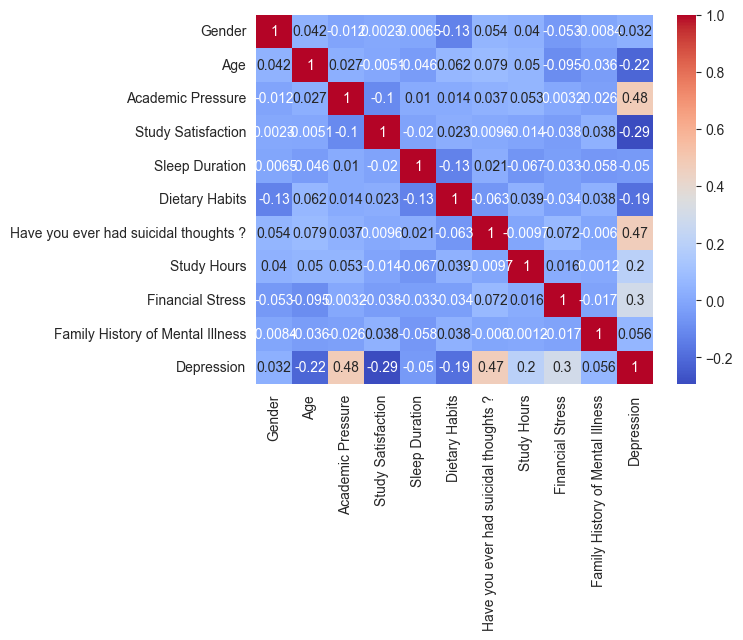

In [11]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

In [12]:
dataset['Sleep Duration'].value_counts()

Sleep Duration
2    128
3    128
1    123
0    123
Name: count, dtype: int64

In [13]:
dataset['Dietary Habits'].value_counts()

Dietary Habits
1    172
0    169
2    161
Name: count, dtype: int64

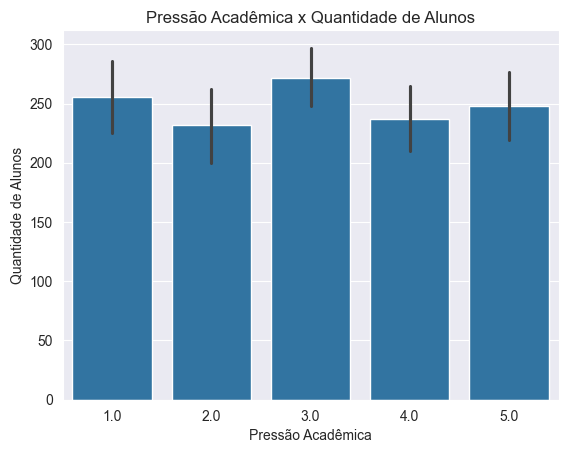

In [14]:
sns.barplot(data=dataset, x='Academic Pressure', y=dataset.index)

plt.xlabel('Pressão Acadêmica')
plt.ylabel('Quantidade de Alunos')
plt.title('Pressão Acadêmica x Quantidade de Alunos')
plt.show()


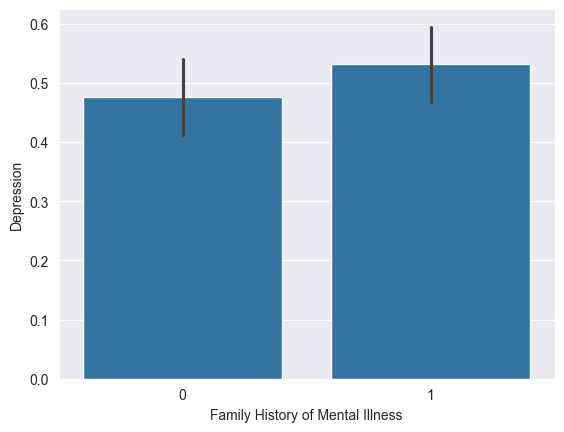

In [83]:

sns.barplot(data=dataset, x='Family History of Mental Illness', y='Depression')
plt.show()

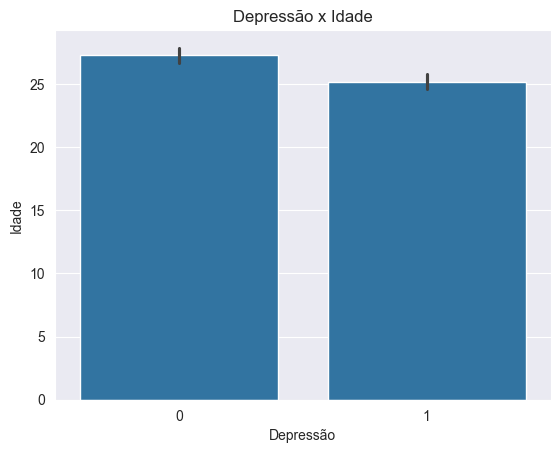

In [16]:
sns.barplot(data=dataset, x='Depression', y='Age')

plt.xlabel('Depressão')
plt.ylabel('Idade')
plt.title('Depressão x Idade')
plt.show()

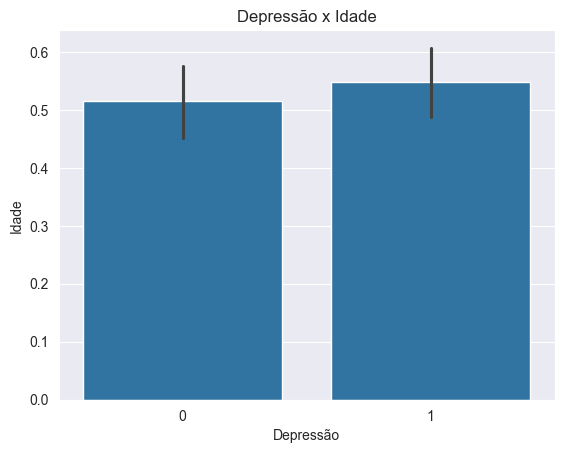

In [84]:
sns.barplot(data=dataset, x='Depression', y='Gender')

plt.xlabel('Depressão')
plt.ylabel('Idade')
plt.title('Depressão x Idade')
plt.show()

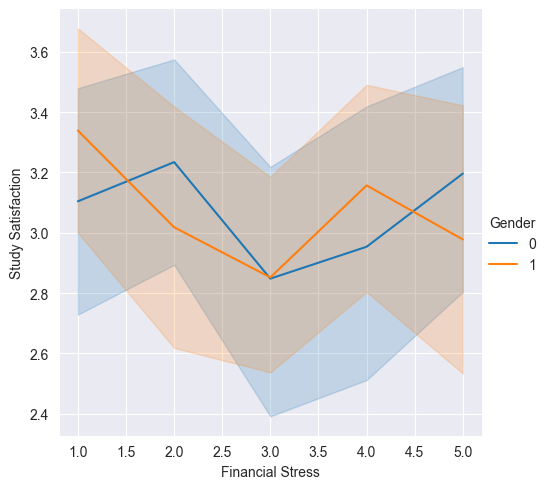

In [17]:
"""
Relação entre estresse financeiro e satisfação de estudo
"""
sns.relplot(
    data=dataset, kind="line",
    x="Financial Stress", y="Study Satisfaction", hue="Gender"
)

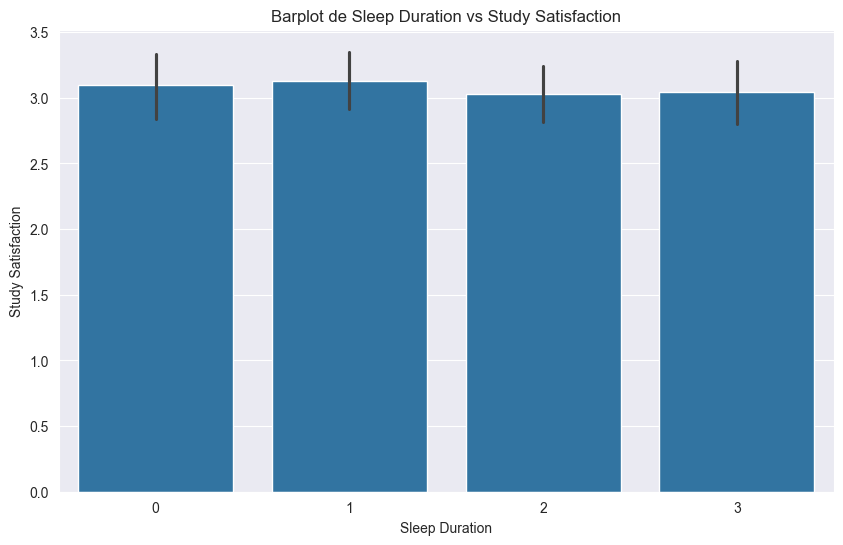

In [18]:
"""
Relação entre horas de sono com satisfação de estudo
"""
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='Sleep Duration', y='Study Satisfaction')

# Adicionar título e rótulos
plt.title('Barplot de Sleep Duration vs Study Satisfaction')
plt.xlabel('Sleep Duration')
plt.ylabel('Study Satisfaction')

# Exibir o gráfico
plt.show()

<Axes: xlabel='Sleep Duration', ylabel='Study Satisfaction'>

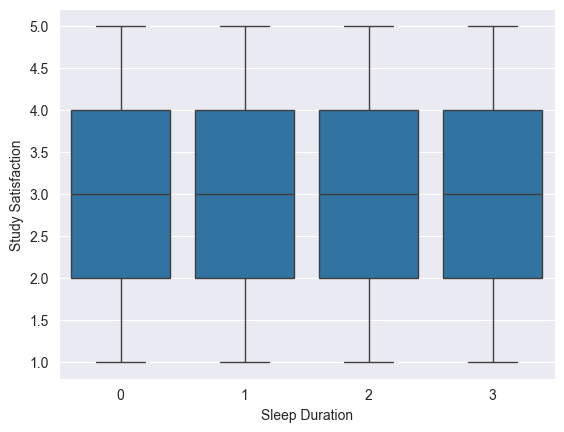

In [19]:
sns.boxplot(
    data=dataset, x='Sleep Duration', y='Study Satisfaction'
)

<Axes: xlabel='Gender', ylabel='Depression'>

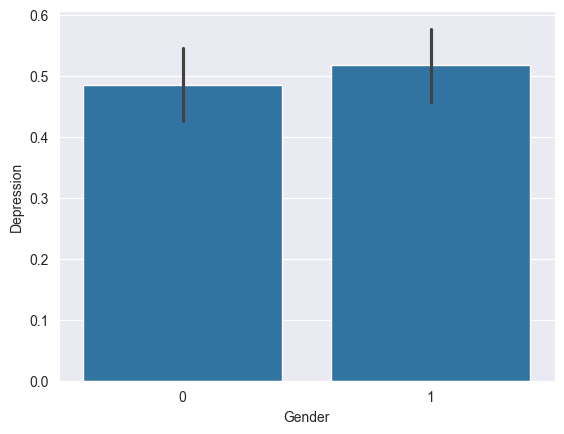

In [20]:
sns.barplot(data=dataset, x='Gender', y='Depression')

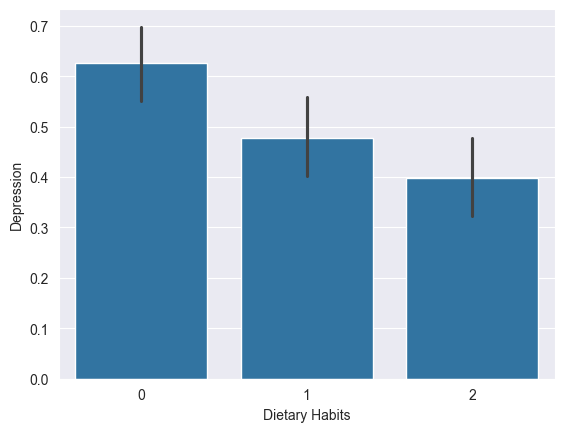

In [21]:
sns.barplot(data=dataset, x='Dietary Habits', y='Depression')
plt.show()

<Axes: xlabel='Academic Pressure', ylabel='Depression'>

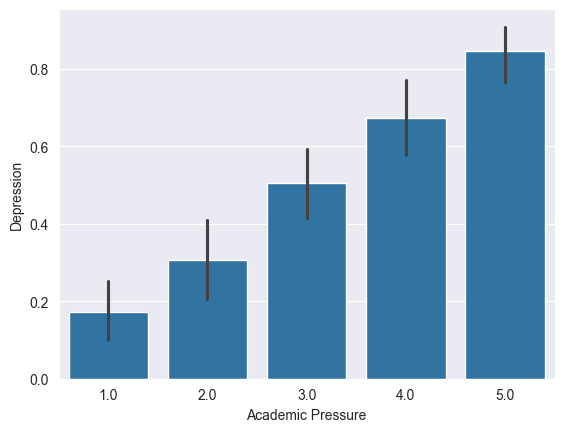

In [22]:
sns.barplot(data=dataset, x='Academic Pressure', y='Depression')

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='Depression'>

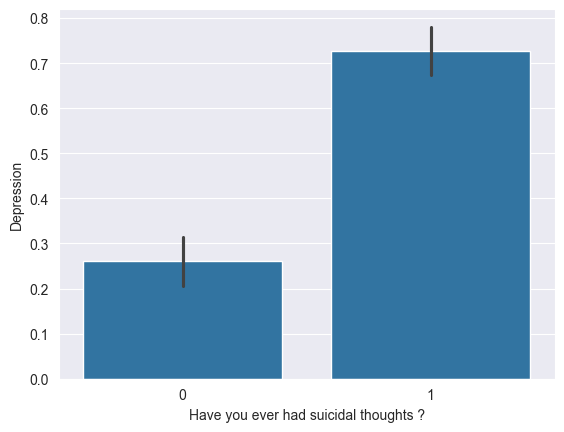

In [79]:
sns.barplot(data=dataset, x='Have you ever had suicidal thoughts ?', y='Depression')

<Axes: xlabel='Family History of Mental Illness', ylabel='Depression'>

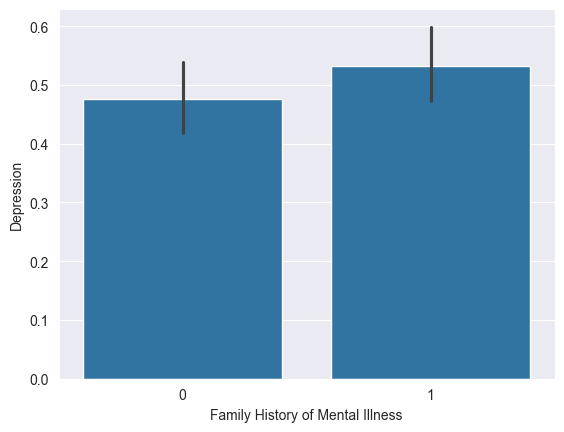

In [24]:
sns.barplot(data=dataset, x='Family History of Mental Illness', y='Depression')

In [86]:
print(dataset['Study Hours'].mean())

6.404382470119522


<Axes: xlabel='Study Hours', ylabel='Depression'>

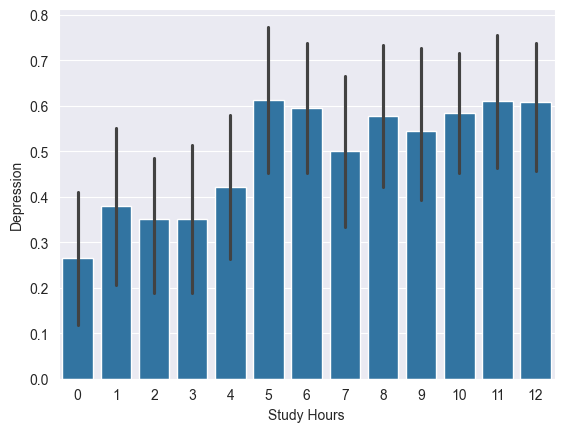

In [25]:
sns.barplot(data=dataset, x='Study Hours', y='Depression')

In [28]:
X = dataset[['Academic Pressure', 'Sleep Duration', 'Study Hours']]
y = dataset['Study Satisfaction']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.score(X_test, y_test)

-0.01400977476960552

In [32]:
model.coef_

array([-0.11274066, -0.00018319, -0.00563108])

In [33]:
model.intercept_

np.float64(3.4850681185409296)

In [34]:
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

1.712562615954739
1.1126978599868766


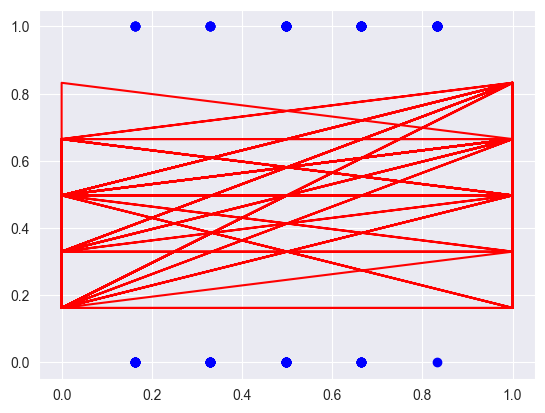

In [63]:
plt.scatter(y_pred, y_test, color='blue')
plt.plot(y_test, y_pred, color='red')

plt.show()

In [19]:
"""
Fazer modelo de regressão linear multipla para prever a depressão de estudantes com base na pressão academica, horas de sono e tempo de estudo
"""

'\nFazer modelo de regressão linear multipla para prever a depressão de estudantes com base na pressão academica, horas de sono e tempo de estudo\n'

In [60]:
X = dataset[['Academic Pressure', 'Sleep Duration', 'Study Hours']]
y = dataset['Depression']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
model.score(X_test, y_test)

0.2743568336725283

In [64]:
model.coef_

array([ 0.16498575, -0.02820477,  0.02106314])

In [65]:
model.intercept_

np.float64(-0.08937973980433656)

In [66]:
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.18067948075664497
0.3731770237735727


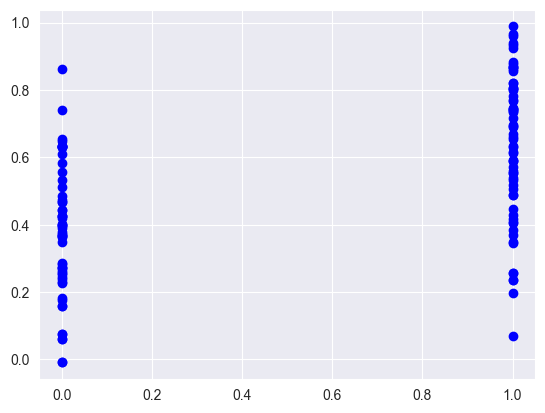

In [84]:
plt.scatter(y_test, y_pred, color='blue')

plt.xticks()
plt.yticks()

plt.show()

In [36]:
X = dataset['Academic Pressure']
y = dataset['Depression']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [47]:
model.score(X_test.values.reshape(-1, 1), y_test)

0.2349178172478762

In [48]:
model.coef_

array([0.16751798])

In [49]:
model.intercept_

np.float64(-0.005186337176122047)

In [50]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.1904994878066985
0.3911475007383008


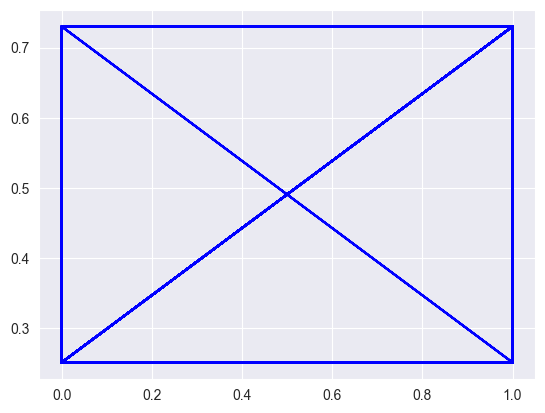

In [89]:
plt.plot(y_test, y_pred, color='blue')

plt.xticks()
plt.yticks()

plt.show()

In [64]:
X=dataset['Have you ever had suicidal thoughts ?']
y=dataset['Depression']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [67]:
model.score(X_test.values.reshape(-1, 1), y_test)

0.17739028839441373

In [68]:
model.coef_

array([0.47882183])

In [69]:
model.intercept_

np.float64(0.2513368983957215)

In [70]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

In [71]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.20482339317062753
0.3979827621284203


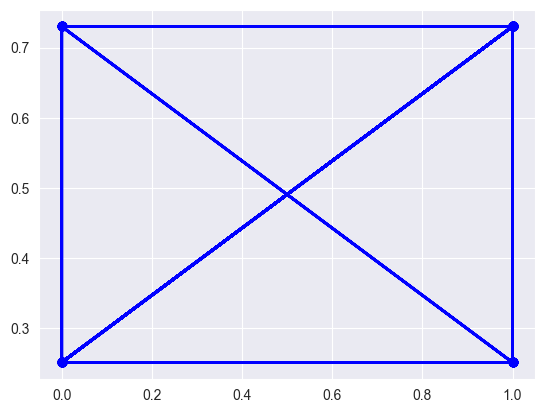

In [74]:
plt.plot(y_test, y_pred, color='blue', linestyle='-', linewidth=2, marker='o')

plt.xticks()
plt.yticks()

plt.show()